In [165]:
import pandas as pd

#PANDAS

In [166]:
import matplotlib.pyplot as plt

#matplotlib

In [167]:
import numpy as np

#numpy

#Feature 1
Write markdown cells in Jupyter explaining your thought process and code. If you make a few plots with matplotlib, explain what the reader is seeing and why you chose to plot things that way.

In [168]:
nut_cols_to_use = ['name', 'calories', 'total_fat', 'protein', 'carbohydrate']

#Created a list

In [169]:
nutrition = pd.read_csv('nutrition.csv',
                        usecols=nut_cols_to_use)
                        
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   calories      8789 non-null   int64 
 2   total_fat     8789 non-null   object
 3   protein       8789 non-null   object
 4   carbohydrate  8789 non-null   object
dtypes: int64(1), object(4)
memory usage: 343.4+ KB


# FEATURE 2
Read in data from a local csv, excel file, json, or any other file type.

In [170]:
nutrition = nutrition.query('name.str.contains("McDONALD")', engine='python')

#select only rows with mcdonalds

In [171]:
mooncsv = pd.read_csv("mooncsv.csv")

#loaded moon csv

In [172]:
moon_ten = mooncsv.head(10)

In [173]:
moon_ten.to_csv('moon_ten.csv')

# Feature 3
Created a new data frame and csv from a previous one to remove values where they don’t belong in your dataset.

In [177]:
moon_ten['key'] = 1
nutrition['key'] = 1

C:\Users\Mitch\AppData\Local\Temp\ipykernel_391832\974489610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moon_ten['key'] = 1


#Feature 4
Many to many relationship
Write custom functions to operate on your data. You may discover that you want tofind out something particular about data that just doesn’t have a built-in Pandas function that accomplishes your goal. Maybe you want your function to read in a DataFrame, search the columns for any mention of “Cars”, then return the lowest-priced car in the column along with the mileage. This category is very open to interpretation, so any function operating on your data will work.

In [176]:
tasty_crater = pd.merge(moon_ten,nutrition,on='key')

#drop key column

In [178]:
tasty_crater = tasty_crater.drop(columns=['key', 'total_fat', 'protein', 'carbohydrate'])

In [179]:
tasty_crater.info

<bound method DataFrame.info of     Crater name   Interior volume  \
0        Fersman         24594.05   
1        Fersman         24594.05   
2        Fersman         24594.05   
3        Fersman         24594.05   
4        Fersman         24594.05   
..           ...              ...   
635       Pavlov         22685.79   
636       Pavlov         22685.79   
637       Pavlov         22685.79   
638       Pavlov         22685.79   
639       Pavlov         22685.79   

                                                  name  calories  
0                               McDONALD'S, Side Salad        20  
1                               McDONALD'S, Hash Brown       271  
2                                McDONALD'S, Hamburger       264  
3                                  McDONALD'S, BIG MAC       257  
4                        McDONALD'S, Hot Mustard Sauce       190  
..                                                 ...       ...  
635  McDONALD'S, Bacon Ranch Salad with Grilled Chi...

In [180]:
tasty_crater["Volume x Calories"] = tasty_crater['Interior volume'] * tasty_crater['calories']

#Formula

In [181]:
tasty_crater[["Crater name ", "Interior volume", "calories", "Volume x Calories"]]

,Crater name,Interior volume,calories,Volume x Calories
0,Fersman,24594.05,20,491881.00
1,Fersman,24594.05,271,6664987.55
2,Fersman,24594.05,264,6492829.20
3,Fersman,24594.05,257,6320670.85
4,Fersman,24594.05,190,4672869.50
...,...,...,...,...
635,Pavlov,22685.79,81,1837548.99
636,Pavlov,22685.79,285,6465450.15
637,Pavlov,22685.79,204,4627901.16
638,Pavlov,22685.79,90,2041721.10


In [182]:
max_idx = tasty_crater.groupby(["Crater name ", "Interior volume"])["Volume x Calories"].idxmax()
result = tasty_crater.loc[max_idx].reset_index(drop=True)
result

,Crater name,Interior volume,name,calories,Volume x Calories
0,Babbage,23992.34,"McDONALD'S, Peanuts (for Sundaes)",640,15355097.6
1,Blackett,23522.29,"McDONALD'S, Peanuts (for Sundaes)",640,15054265.6
2,Fersman,24594.05,"McDONALD'S, Peanuts (for Sundaes)",640,15740192.0
3,Hipparchus,23016.85,"McDONALD'S, Peanuts (for Sundaes)",640,14730784.0
4,Hirayama,23484.91,"McDONALD'S, Peanuts (for Sundaes)",640,15030342.4
5,Jules Verne,23608.38,"McDONALD'S, Peanuts (for Sundaes)",640,15109363.2
6,Longomontanus,23593.40,"McDONALD'S, Peanuts (for Sundaes)",640,15099776.0
7,Neper,23153.74,"McDONALD'S, Peanuts (for Sundaes)",640,14818393.6
8,Pavlov,22685.79,"McDONALD'S, Peanuts (for Sundaes)",640,14518905.6
9,Pythagoras,23239.07,"McDONALD'S, Peanuts (for Sundaes)",640,14873004.8


<Axes: title={'center': 'Scatter Crater'}, xlabel='Crater name ', ylabel='Volume x Calories'>

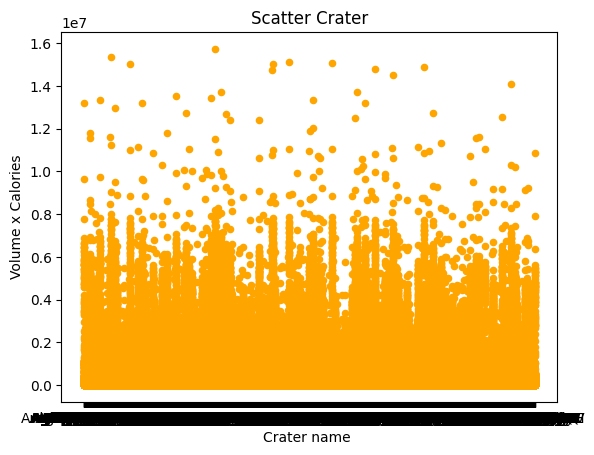

In [183]:
tastiest.plot(kind = 'scatter', x= 'Crater name ', y = 'Volume x Calories',
                    color = 'orange', title = 'Scatter Crater')

In [ ]:
plt.figure(figsize = (12, 6))
plt.bar(bar_crater['Crater name '], bar_crater['Volume x Calories'])
plt.xlabel('Crater name ')
plt.ylabel('Volume x Calories')
plt.show()

NameError: name 'bar_crater' is not defined

<Figure size 1200x600 with 0 Axes>